# TCAV Results

In [2]:
import os
import sys

'''
Initial setup
'''
project_id = 'serene-athlete-271523'
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False
if IN_COLAB:
    from google.colab import drive
    
    drive.mount("/content/drive")
    os.chdir("/content/drive")

    base_drive = 'Shared drives/TCAV4OCT/'
    
    %tensorflow_version 1.15.2
    import tensorflow as tf
elif not IN_COLAB:
    import tensorflow as tf
    root_dir = '/home/jupyter/tcav_synced/'
    sync_me = True
    # 1. install command: curl https://rclone.org/install.sh | sudo bash
    # 2. follow instructions to set up credentials, use remote login in last step: https://rclone.org/drive/
    #!rclone sync tcav {root_dir} -P
    base_drive = root_dir
    if sync_me:
        !rclone copy {root_dir} tcav:
        print('done safe-syncing from cloud to drive')
        !rclone copy tcav: {root_dir}
        print('done safe-syncing from drive to cloud')
    else:
        print('not syncing')
    print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
    if tf.test.gpu_device_name(): 
        print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
        print(tf.DeviceSpec(device_type="GPU", device_index=34343))
        gpus = True
        strategy = tf.distribute.MirroredStrategy()
    else:
        gpus = False
        print("Not using GPU version of TF")
    #!rclone copy {data_dir} midus:data  -P
    #!rclone copy {results_dir} midus:results -P
os.chdir(base_drive)
try:
  !pip uninstall -y tcav
except:
  print('tcav not installed')
!pip3 install git+https://github.com/schko/tcav.git
# set this to true to run tcav default
default_vars = False

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.15.2`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.
  Cloning https://github.com/schko/tcav.git to /tmp/pip-req-build-x1gjvl0x
  Running command git clone -q https://github.com/schko/tcav.git /tmp/pip-req-build-x1gjvl0x
  Created wheel for tcav: filename=tcav-0.2.1-cp36-none-any.whl size=38707 sha256=351269f8fef5dd77b309f026bf41427fb8f767248c8e6cb54a07c2c4e2363bb1


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import tcav.activation_generator as act_gen
import tcav.cav as cav
import tcav.model  as model
import tcav.tcav as tcav
import tcav.utils as utils
import tcav.utils_plot as utils_plot # utils_plot requires matplotlib
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

tf.VERSION

'1.15.2'

In [5]:
# folder prefix 
prefix = 'playground'

# This is the name of your model wrapper (InceptionV3 and GoogleNet are provided in model.py)
# model_to_run = 'GoogleNet'  
user = 'sharath'
# the name of the parent directory that results are stored (only if you want to cache)
project_name = 'tcav_class_test'
working_dir = "/tmp/" + user + '/' + project_name
# where activations are stored (only if your act_gen_wrapper does so)
activation_dir =  working_dir+ '/activations/'
# where CAVs are stored. 
# You can say None if you don't wish to store any.
cav_dir = working_dir + '/cavs/'
# where the images live. 
source_dir = prefix + "/image_net_subsets/"
utils.make_dir_if_not_exists(activation_dir)
utils.make_dir_if_not_exists(working_dir)
utils.make_dir_if_not_exists(cav_dir)

# this is a regularizer penalty parameter for linear classifier to get CAVs. 
alphas = [0.1]   

if default_vars:
  target = 'zebra'
  bottlenecks = ['mixed4c']  # @param 
else:
  target = 'GlaucomaFull'
  bottlenecks = ['flatten_1','dense_1','dense_3']  # @param 
  #bottlenecks = ['mixed_6c']
  concepts = ["RGCPprob","RNFLprob","RNFLthickness","RGCPthickness"]
  #concepts = ["red_texture", "red_solid", "green_solid", "green_texture"]
  #concepts = ["RGCPprob","RNFLprob","RNFLthickness","RGCPthickness"]
#concepts = ["dotted","striped","zigzagged"]   

In [6]:
#results = pd.DataFrame(results_1).append(pd.DataFrame(results_2)).to_dict(orient='records')
results = pickle.load( open( "resultFiles/rc_250/result_incep_glaucomafull.pickle", "rb" ) )

    Bottleneck = flatten_1. TCAV Score = 0.74 (+- 0.00), random was 0.43 (+- 0.33). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.74 (+- 0.01), random was 0.43 (+- 0.33). p-val = 0.000 (significant)
    Bottleneck = dense_3. TCAV Score = 0.87 (+- 0.12), random was 0.50 (+- 0.32). p-val = 0.000 (significant)
    Bottleneck = flatten_1. TCAV Score = 0.67 (+- 0.20), random was 0.43 (+- 0.33). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.64 (+- 0.22), random was 0.43 (+- 0.33). p-val = 0.000 (significant)
    Bottleneck = dense_3. TCAV Score = 0.35 (+- 0.26), random was 0.50 (+- 0.32). p-val = 0.000 (significant)
    Bottleneck = flatten_1. TCAV Score = 0.15 (+- 0.20), random was 0.43 (+- 0.33). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.09 (+- 0.07), random was 0.43 (+- 0.33). p-val = 0.000 (significant)
    Bottleneck = dense_3. TCAV Score = 0.48 (+- 0.33), random was 0.50 (+- 0.32). p-val = 0.585 (not significant)


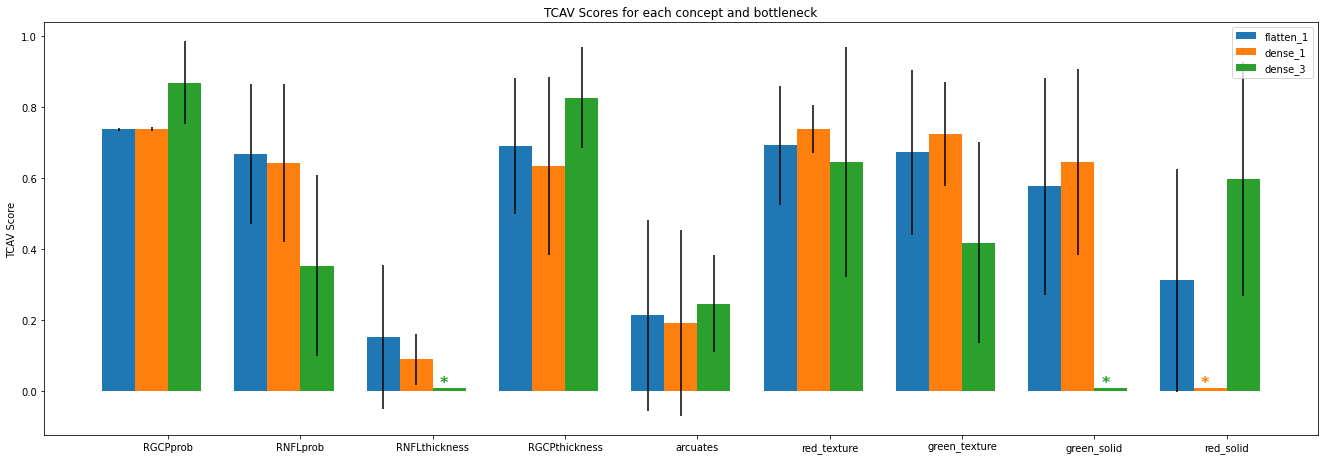

In [21]:
from scipy.stats import ttest_ind

def plot_results(results, random_counterpart=None, random_concepts=None, num_random_exp=100,
    min_p_val=0.05, tcav_type='raw'):
  """Helper function to organize results.
  When run in a notebook, outputs a matplotlib bar plot of the
  TCAV scores for all bottlenecks for each concept, replacing the
  bars with asterisks when the TCAV score is not statistically significant.
  If you ran TCAV with a random_counterpart, supply it here, otherwise supply random_concepts.
  If you get unexpected output, make sure you are using the correct keywords.
  Args:
    results: dictionary of results from TCAV runs.
    random_counterpart: name of the random_counterpart used, if it was used. 
    random_concepts: list of random experiments that were run. 
    num_random_exp: number of random experiments that were run.
    min_p_val: minimum p value for statistical significance
    tcav_type: raw or scaled positive or all scores
  """

  # helper function, returns if this is a random concept
  def is_random_concept(concept):
    if random_counterpart:
      return random_counterpart == concept
    
    elif random_concepts:
      return concept in random_concepts

    else:
      return 'random500_' in concept

  # prepare data
  # dict with keys of concepts containing dict with bottlenecks
  result_summary = {}
    
  # random
  random_i_ups = {}
    
  for result in results:
    if result['cav_concept'] not in result_summary:
      result_summary[result['cav_concept']] = {}
    
    if result['bottleneck'] not in result_summary[result['cav_concept']]:
      result_summary[result['cav_concept']][result['bottleneck']] = []
    
    result_summary[result['cav_concept']][result['bottleneck']].append(result)

    # store random
    if is_random_concept(result['cav_concept']):
      if result['bottleneck'] not in random_i_ups:
        random_i_ups[result['bottleneck']] = []
      if tcav_type is 'scaled':
        pos_mean = np.mean([i for i in result['val_directional_dirs'] if i > 0])
        random_i_ups[result['bottleneck']].append(result['i_up']*pos_mean)
      elif tcav_type is 'scaled_all':
        random_i_ups[result['bottleneck']].append(result['i_up']*np.mean(result['val_directional_dirs']))
      elif tcav_type is 'scaled_abs':
        pos_mean = np.mean([abs(i) for i in result['val_directional_dirs']])
        random_i_ups[result['bottleneck']].append(result['i_up']*pos_mean)
      elif tcav_type is 'raw':
        random_i_ups[result['bottleneck']].append(result['i_up'])
    
  # to plot, must massage data again 
  plot_data = {}
  plot_concepts = []
    
  # print concepts and classes with indentation
  for concept in result_summary:
    # if not random
    if not is_random_concept(concept):
      plot_concepts.append(concept)

      for bottleneck in result_summary[concept]:
        if tcav_type is 'scaled_pos':
          i_ups = [item['i_up']*np.mean([i for i in item['val_directional_dirs'] if i > 0]) for item in result_summary[concept][bottleneck]]
        elif tcav_type is 'scaled_all':
          i_ups = [item['i_up']*np.mean(item['val_directional_dirs']) for item in result_summary[concept][bottleneck]]
        elif tcav_type is 'scaled_abs':
          i_ups = [item['i_up']*np.mean([abs(i) for i in item['val_directional_dirs']]) for item in result_summary[concept][bottleneck]]
        elif tcav_type is 'raw':
          i_ups = [item['i_up'] for item in result_summary[concept][bottleneck]]
        # Calculate statistical significance
        _, p_val = ttest_ind(random_i_ups[bottleneck], i_ups)
                  
        if bottleneck not in plot_data:
          plot_data[bottleneck] = {'bn_vals': [], 'bn_stds': [], 'significant': []}

        if p_val > min_p_val:
          # statistically insignificant
          plot_data[bottleneck]['bn_vals'].append(0.01)
          plot_data[bottleneck]['bn_stds'].append(0)
          plot_data[bottleneck]['significant'].append(False)
            
        else:
          plot_data[bottleneck]['bn_vals'].append(np.mean(i_ups))
          plot_data[bottleneck]['bn_stds'].append(np.std(i_ups))
          plot_data[bottleneck]['significant'].append(True)
        print(3 * " ", "Bottleneck =", ("%s. TCAV Score = %.2f (+- %.2f), "
            "random was %.2f (+- %.2f). p-val = %.3f (%s)") % (
            bottleneck, np.mean(i_ups), np.std(i_ups),
            np.mean(random_i_ups[bottleneck]),
            np.std(random_i_ups[bottleneck]), p_val,
            "not significant" if p_val > min_p_val else "significant"))
        
  # subtract number of random experiments
  if random_counterpart:
    num_concepts = len(result_summary) - 1
  elif random_concepts:
    num_concepts = len(result_summary) - len(random_concepts)
  else: 
    num_concepts = len(result_summary) - num_random_exp
    
  num_bottlenecks = len(plot_data)
  bar_width = 0.35
    
  # create location for each bar. scale by an appropriate factor to ensure 
  # the final plot doesn't have any parts overlapping
  index = np.arange(num_concepts) * bar_width * (num_bottlenecks + 1)

  # matplotlib
  fig, ax = plt.subplots()
  fig.set_size_inches(18.5, 6.5, forward=True)

  # draw all bottlenecks individually
  for i, [bn, vals] in enumerate(plot_data.items()):
    bar = ax.bar(index + i * bar_width, vals['bn_vals'],
        bar_width, yerr=vals['bn_stds'], label=bn)
    
    # draw stars to mark bars that are stastically insignificant to 
    # show them as different from others
    for j, significant in enumerate(vals['significant']):
      if not significant:
        ax.text(index[j] + i * bar_width - 0.1, 0.01, "*",
            fontdict = {'weight': 'bold', 'size': 16,
            'color': bar.patches[0].get_facecolor()})
  # set properties
  ax.set_title('TCAV Scores for each concept and bottleneck')
  ax.set_ylabel('TCAV Score')
  ax.set_xticks(index + num_bottlenecks * bar_width / 2)
  ax.set_xticklabels(plot_concepts)
  ax.legend()
  fig.tight_layout()
  plt.show()

add_rcs = []
unrelated = 2
for i in [1600]:
  plt_results = results.copy()
  # subset for testing
  results_df = pd.DataFrame(plt_results)
  subset_concepts = results_df['cav_concept'].unique()[0:i]
  #add_rcs = subset_concepts[-unrelated:]
    #print(add_rcs)
  results_df = results_df[results_df['cav_concept'].isin(subset_concepts)]
  plt_results = results_df.to_dict(orient='records')
  results_df = pd.DataFrame(plt_results)
  rcs = results_df['cav_concept'].unique()
  rcs = [x for x in rcs if x not in concepts]
  add_rcs = ["arcuates", "red_texture", "green_texture", "green_solid", "red_solid"]
  rcs = [x for x in rcs if x not in add_rcs][0:160]
  plot_results(plt_results, random_concepts=rcs, tcav_type='raw')